<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-df_wsb.pkl-generated-in-the-01-file-in." data-toc-modified-id="Read-the-df_wsb.pkl-generated-in-the-01-file-in.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Read the </font></font><code>df_wsb.pkl</code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">generated in the 01 file in. </font></font></a></span></li><li><span><a href="#Convert-the-monthly-mentions-to-quarterly-format." data-toc-modified-id="Convert-the-monthly-mentions-to-quarterly-format.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Convert the monthly mentions to quarterly format. </font></font></a></span></li><li><span><a href="#Add-the-mention-of-tickers-into-the-quartely-dataframe." data-toc-modified-id="Add-the-mention-of-tickers-into-the-quartely-dataframe.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Add the mention of tickers into the quartely </font></font></a></span></li><li><span><a href="#Combine-with-Ticker-Price-dataset." data-toc-modified-id="Combine-with-Ticker-Price-dataset.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Combine with Ticker Price </font></font></a></span></li><li><span><a href="#Merge-the-quarterly-mention-dataset-with-price-dataset." data-toc-modified-id="Merge-the-quarterly-mention-dataset-with-price-dataset.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Merge the quarterly mention dataset with price </font></font></a></span></li><li><span><a href="#Regression-on-quarterly-return." data-toc-modified-id="Regression-on-quarterly-return.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> Regression on quarterly </font></font></a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path='C:/Users/hs324/OneDrive/Desktop/Class_Files/03_2021Fall_CU/GR5067_NLP/03_Group_Project/'

### Read the `df_wsb.pkl` generated in the 01 file in.

In [3]:
df_extract=pickle.load(open('df_wsb.pkl','rb'))

In [4]:
df_extract

,year,month,body,symbol,bodylen
0,2012,4,This is a fantastic idea Ill toss mine up in a...,[JPM],23
1,2012,4,INTC is on 417,[INTC],4
3,2012,4,GMCR falls GOOG falls slightly GRPN will go in...,"[GOOG, GRPN, LVS]",35
4,2012,4,CROX 426 BZH 51 im expecting both to beat esti...,"[BZH, CROX]",10
5,2012,4,Shorting GOOG and JPM ltcrosses fingersgt,"[GOOG, JPM]",6
...,...,...,...,...,...
13476608,2020,8,MU 45p,[MU],2
13476611,2020,8,RKT Do it up,[RKT],4
13476620,2020,8,Ok so I ve mentioned this ticker a few times p...,[RPD],60
13476639,2020,8,MSFT option flow for today 75000 Nov 2020 call...,[MSFT],29


### Convert the monthly mentions to quarterly format.

In [5]:
def quarter(month):
    if month in [1, 2, 3]:
        val = '1'
    elif month in [4, 5, 6]:
        val = '2'
    elif month in [7, 8, 9]:
        val = '3'
    else:
        val = '4'
    return val

In [6]:
# Add quarter column to dataframe.
df_extract['quarter']=df_extract['month'].apply(quarter)

In [7]:
# Convert list to string as a new column.
df_extract['symbol_string']=df_extract['symbol'].apply(lambda x: ','.join(map(str,x)))

In [8]:
# Then convert the string created in the previous step to seperate rows.
df_extract.assign(symbol_string=df_extract.symbol_string.str.split(',')).explode('symbol_string')

,year,month,body,symbol,bodylen,quarter,symbol_string
0,2012,4,This is a fantastic idea Ill toss mine up in a...,[JPM],23,2,JPM
1,2012,4,INTC is on 417,[INTC],4,2,INTC
3,2012,4,GMCR falls GOOG falls slightly GRPN will go in...,"[GOOG, GRPN, LVS]",35,2,GOOG
3,2012,4,GMCR falls GOOG falls slightly GRPN will go in...,"[GOOG, GRPN, LVS]",35,2,GRPN
3,2012,4,GMCR falls GOOG falls slightly GRPN will go in...,"[GOOG, GRPN, LVS]",35,2,LVS
...,...,...,...,...,...,...,...
13476608,2020,8,MU 45p,[MU],2,3,MU
13476611,2020,8,RKT Do it up,[RKT],4,3,RKT
13476620,2020,8,Ok so I ve mentioned this ticker a few times p...,[RPD],60,3,RPD
13476639,2020,8,MSFT option flow for today 75000 Nov 2020 call...,[MSFT],29,3,MSFT


In [9]:
# Generate quartely records and reorgnize the structure.
quartely=df_extract.groupby(['year','quarter'])
grouped_symbol=quartely['symbol_string'].apply(list)
grouped_symbol=grouped_symbol.reset_index()
grouped_symbol.head()

,year,quarter,symbol_string
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,..."
1,2012,3,"[D, FB, MA, NAVB, NAVB,VERY, TA, D, NAVB, NAVB..."
2,2012,4,"[ML, VERY,C, APDN, NOG, FB, AMD,ATI, GE,YUM,GO..."
3,2013,1,"[FSLR, PODD, AAPL, AAPL, GOOG, CC, ATHX, ACAD,..."
4,2013,2,"[INO, EXAS, NVIV, TY, ATEC,BDSI, HBAN, RGEN, S..."


###  Add the mention of tickers into the quartely dataframe.

In [10]:
# Convert list to string as new column, and then explode to seperate rows.
grouped_symbol['ticker'] = grouped_symbol['symbol_string'].apply(lambda x: ','.join(map(str, x)))
ticker_df = grouped_symbol.assign(ticker = grouped_symbol.ticker.str.split(",")).explode('ticker')
ticker_df

,year,quarter,symbol_string,ticker
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,...",JPM
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,...",INTC
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,...",GOOG
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,...",GRPN
0,2012,2,"[JPM, INTC, GOOG,GRPN,LVS, BZH,CROX, GOOG,JPM,...",LVS
...,...,...,...,...
33,2020,3,"[ODP, AMZN, EKSO, NET, BK, R, TA, DOCU, DOCU, ...",MU
33,2020,3,"[ODP, AMZN, EKSO, NET, BK, R, TA, DOCU, DOCU, ...",RKT
33,2020,3,"[ODP, AMZN, EKSO, NET, BK, R, TA, DOCU, DOCU, ...",RPD
33,2020,3,"[ODP, AMZN, EKSO, NET, BK, R, TA, DOCU, DOCU, ...",MSFT


In [11]:
# Count occurences of each ticker after grouping by year+qarter, by size() function. 
freq=ticker_df.groupby(['year','quarter','ticker'])
quarterly_freq_mention=freq.size().reset_index()
quarterly_freq_mention=quarterly_freq_mention.rename(columns={0:'freq'})
quarterly_freq_mention

,year,quarter,ticker,freq
0,2012,2,AAPL,30
1,2012,2,AC,1
2,2012,2,AGR,1
3,2012,2,AKAM,3
4,2012,2,AMD,2
...,...,...,...,...
27464,2020,3,ZS,43
27465,2020,3,ZTS,3
27466,2020,3,ZVO,33
27467,2020,3,ZYNE,3


In [12]:
quarterly_freq_mention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27469 entries, 0 to 27468
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     27469 non-null  int64 
 1   quarter  27469 non-null  object
 2   ticker   27469 non-null  object
 3   freq     27469 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 858.5+ KB


In [13]:
quarterly_freq_mention.sort_values(by=['year','quarter','freq'],ascending=False)

,year,quarter,ticker,freq
27282,2020,3,TSLA,21464
26748,2020,3,MSFT,9535
25796,2020,3,AMZN,8497
25781,2020,3,AMD,8478
27410,2020,3,WMT,5987
...,...,...,...,...
115,2012,2,WSM,1
116,2012,2,WTI,1
117,2012,2,WYNN,1
119,2012,2,XOM,1


In [34]:
# Change the data type of the quartely info in the quarterly_freq_mention dataset.
quarterly_freq_mention['quarter'] = quarterly_freq_mention['quarter'].astype(str).astype(int)
quarterly_freq_mention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27469 entries, 0 to 27468
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     27469 non-null  int64 
 1   quarter  27469 non-null  int32 
 2   ticker   27469 non-null  object
 3   freq     27469 non-null  int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 751.2+ KB


### Combine with Ticker Price dataset.

In [15]:
price = pd.read_csv('crsp.csv')

In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765843 entries, 0 to 765842
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    765843 non-null  int64  
 1   ticker  756960 non-null  object 
 2   price   752771 non-null  float64
 3   volume  756423 non-null  float64
 4   bid     752769 non-null  float64
 5   ask     752766 non-null  float64
 6   shrout  760580 non-null  float64
 7   vwretd  765843 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 46.7+ MB


In [17]:
# Change time to datetime. 
price['date']=pd.to_datetime(price['date'],format='%Y%m%d')

In [18]:
# Extract the year,quarter,month from the date info.
price['quarter'], price['year'], price['month'] = price['date'].dt.quarter, price['date'].dt.year, price['date'].dt.month

In [19]:
price

,date,ticker,price,volume,bid,ask,shrout,vwretd,quarter,year,month
0,2012-02-29,EGAS,11.16080,2209.0,11.10000,11.20000,8154.0,0.041253,1,2012,2
1,2012-03-30,EGAS,11.66000,2405.0,11.63000,11.66000,8154.0,0.024039,1,2012,3
2,2012-04-30,EGAS,11.44010,2252.0,11.45000,11.49000,8155.0,-0.006840,2,2012,4
3,2012-05-31,EGAS,10.43000,2372.0,10.36000,10.45000,8156.0,-0.065641,2,2012,5
4,2012-06-29,EGAS,10.10000,4594.0,10.00000,10.10000,8156.0,0.038181,2,2012,6
...,...,...,...,...,...,...,...,...,...,...,...
765838,2020-06-30,TSLA,1079.81006,2551787.0,1079.00000,1079.82996,186000.0,0.025299,2,2020,6
765839,2020-07-31,TSLA,1430.76001,3776740.0,1431.89001,1432.00000,186362.0,0.055529,3,2020,7
765840,2020-08-31,TSLA,498.32001,4051970.0,498.28000,498.51001,931809.0,0.068443,3,2020,8
765841,2020-09-30,TSLA,429.01001,17331954.0,428.82001,429.01999,948000.0,-0.035057,3,2020,9


In [20]:
# Create the quarterly_price dataset including only the desired columns.
quarterly_price = price[['ticker', 'price', 'quarter','year','month', 'volume']]

In [21]:
# Get ride of row for first quarter of 2012 due to incomplete data
quarterly_price = quarterly_price.drop(
    quarterly_price[(quarterly_price['year'] == 2012) & 
                    (quarterly_price['quarter'] == 1)].index)

In [22]:
def total_return(prices):
    '''
    Describtion: Returns the equity return between the first and last value of the DataFrame.
    
    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame
    
    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    
    '''
    return prices.iloc[-1]/prices.iloc[0]-1

In [29]:
# Calculate the quartely return using the function defined above.
quarterly_return=quarterly_price.groupby(['year','ticker','quarter'])['price'].apply(total_return)

In [30]:
# Organize the structure and rename the columns.
quarterly_return=quarterly_return.to_frame().reset_index()
quarterly_return.rename(columns={'price': 'quarterly_return'}, inplace=True)
quarterly_return

,year,ticker,quarter,quarterly_return
0,2012,A,2,-0.069701
1,2012,A,3,0.004179
2,2012,A,4,0.137538
3,2012,AA,2,-0.100719
4,2012,AA,3,0.045455
...,...,...,...,...
255643,2020,ZYNE,4,0.000000
255644,2020,ZYXI,1,0.151925
255645,2020,ZYXI,2,0.408267
255646,2020,ZYXI,3,-0.087343


In [31]:
# Create Volumn dataset for future regression use.
volume = price[['ticker', 'price', 'quarter','year','month', 'volume']]

In [32]:
# Clean the Volum dataset with the logic as same as above.
volume = volume.drop(
    volume[(volume['year'] == 2012) & 
           (volume['quarter'] == 1)].index)

quarterly_volume = volume.groupby(['year', 'ticker', 'quarter'])['volume'].apply(lambda x: x.iloc[-1] - x.iloc[0])
quarterly_volume = quarterly_volume.to_frame().reset_index()

In [33]:
quarterly_volume

,year,ticker,quarter,volume
0,2012,A,2,56697.0
1,2012,A,3,249370.0
2,2012,A,4,-40034.0
3,2012,AA,2,-1228178.0
4,2012,AA,3,-1047375.0
...,...,...,...,...
255643,2020,ZYNE,4,0.0
255644,2020,ZYXI,1,15282.0
255645,2020,ZYXI,2,207972.0
255646,2020,ZYXI,3,-163969.0


### Merge the quarterly mention dataset with price dataset.

In [40]:
mention_counts = pd.merge(
    quarterly_return, quarterly_freq_mention, 
    how='inner', on = ['year','quarter','ticker'])

In [47]:
# Create movement dummies for future regreesion use.
mention_counts['movement'] = np.where(
    mention_counts['quarterly_return'] >= 0, 1, 0)

In [48]:
mention_counts

,year,ticker,quarter,quarterly_return,freq,movement
0,2012,AAPL,2,0.000034,30,1
1,2012,AAPL,3,0.092254,19,1
2,2012,AAPL,4,-0.106073,6,0
3,2012,ACAD,3,0.571429,2,1
4,2012,ACAD,4,0.978723,4,1
...,...,...,...,...,...,...
24998,2020,ZYNE,2,-0.129199,11,0
24999,2020,ZYNE,3,-0.117333,3,0
25000,2020,ZYXI,1,0.151925,1,1
25001,2020,ZYXI,2,0.408267,3,1


In [51]:
# Add the volumn information into the mention counts.
mention_counts_volume = pd.merge(mention_counts, quarterly_volume, how='inner', on = ['year','quarter','ticker'])
mention_counts_volume

,year,ticker,quarter,quarterly_return,freq,movement,volume
0,2012,AAPL,2,0.000034,30,1,-2887609.0
1,2012,AAPL,3,0.092254,19,1,102860.0
2,2012,AAPL,4,-0.106073,6,0,-67443.0
3,2012,ACAD,3,0.571429,2,1,247777.0
4,2012,ACAD,4,0.978723,4,1,135568.0
...,...,...,...,...,...,...,...
24998,2020,ZYNE,2,-0.129199,11,0,497758.0
24999,2020,ZYNE,3,-0.117333,3,0,-182344.0
25000,2020,ZYXI,1,0.151925,1,1,15282.0
25001,2020,ZYXI,2,0.408267,3,1,207972.0


C:\Users\hs324\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hs324\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


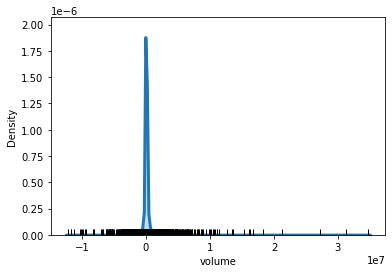

In [43]:
# Create the histgram for volume.
sns.distplot(mention_counts_volume['volume'], hist = False, kde= True,rug = True,
            kde_kws = {'shade': True, 'linewidth':3},
             rug_kws = {'color': 'black'},
             label= 'Volume')
plt.show()

### Regression on quarterly return.

In [49]:
# Fit the regression model, sadly the regression result isn't idela.
lm_quarterly = smf.ols('movement ~ freq', data = mention_counts).fit()
lm_quarterly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               movement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3442
Date:                Sun, 23 Jan 2022   Prob (F-statistic):              0.557
Time:                        16:54:44   Log-Likelihood:                -18143.
No. Observations:               25003   AIC:                         3.629e+04
Df Residuals:                   25001   BIC:                         3.631e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5086      0.003    159.562      0.000       0.502       0.515
freq        3.792e-06   6.46e-06      0.587      0.557   -8.88e-06    1.65e-05
==============================================================================
Omnibus:                    85548.893   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4166.935
Skew:                          -0.035   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                         497.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Change to logit regression model.
lm_quarterly_movement = smf.ols('movement ~ freq + C(year)', data = mention_counts).fit()
lm_quarterly_movement.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               movement   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     80.38
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          9.77e-148
Time:                        17:03:22   Log-Likelihood:                -17786.
No. Observations:               25003   AIC:                         3.559e+04
Df Residuals:                   24993   BIC:                         3.567e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4652      0.033     14.312      0.000       0.401       0.529
C(year)[T.2013]     0.1481      0.042      3.500      0.000       0.065       0.231
C(year)[T.2014]     0.1588      0.037      4.279      0.000       0.086       0.232
C(year)[T.2015]    -0.0767      0.034     -2.227      0.026      -0.144      -0.009
C(year)[T.2016]     0.1457      0.034      4.325      0.000       0.080       0.212
C(year)[T.2017]     0.1368      0.034      4.080      0.000       0.071       0.202
C(year)[T.2018]    -0.0504      0.033     -1.509      0.131      -0.116       0.015
C(year)[T.2019]     0.0831      0.033      2.504      0.012       0.018       0.148
C(year)[T.2020]    -0.0243      0.033     -0.731      0.465      -0.089       0.041
freq             1.217e-05   6.41e-06      1.900      0.057   -3.87e-07    2.47e-05
==============================================================================
Omnibus:                    91900.884   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3701.883
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                       1.116   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Include Volume into the previous regression model.
logit_quarterly_v = sm.formula.logit('movement ~ freq + volume + C(year)', data = mention_counts_volume).fit()
logit_quarterly_v.summary()

Optimization terminated successfully.
         Current function value: 0.678387
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               movement   No. Observations:                24986
Model:                          Logit   Df Residuals:                    24975
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Jan 2022   Pseudo R-squ.:                 0.02106
Time:                        17:00:25   Log-Likelihood:                -16950.
converged:                       True   LL-Null:                       -17315.
Covariance Type:            nonrobust   LLR p-value:                3.365e-150
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1357      0.132     -1.025      0.305      -0.395       0.124
C(year)[T.2013]     0.5794      0.174      3.329      0.001       0.238       0.921
C(year)[T.2014]     0.6282      0.152      4.129      0.000       0.330       0.926
C(year)[T.2015]    -0.3183      0.141     -2.265      0.024      -0.594      -0.043
C(year)[T.2016]     0.5900      0.137      4.297      0.000       0.321       0.859
C(year)[T.2017]     0.5543      0.137      4.058      0.000       0.287       0.822
C(year)[T.2018]    -0.2085      0.136     -1.534      0.125      -0.475       0.058
C(year)[T.2019]     0.3295      0.135      2.438      0.015       0.065       0.594
C(year)[T.2020]    -0.0902      0.135     -0.668      0.504      -0.355       0.175
freq             6.997e-05   2.78e-05      2.519      0.012    1.55e-05       0.000
volume          -8.184e-08   1.86e-08     -4.410      0.000   -1.18e-07   -4.55e-08
===================================================================================
"""